# PCA Pairs Trading in the Korea Equities Market

#### Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### System Setting

In [4]:
# Prevent Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Pickle 로딩 및 데이터 전처리

In [12]:
ticker_series = pd.read_pickle("./pickle/kse_18_20_ticker.pkl")
ticker_series

A005930        삼성전자
A000660      SK하이닉스
A207940    삼성바이오로직스
A035420       NAVER
A068270        셀트리온
             ...   
A005030        부산주공
A019490        하이트론
A109070         컨버즈
A025890        한국주강
A008500        일정실업
Name: 0, Length: 776, dtype: object

In [13]:
sector_df = pd.read_pickle("./pickle/kse_sector.pkl")
sector_df

,A005930,A000660,A207940,A035420,A068270,A051910,A051900,A005380,A006400,A028260,...,A012600,A015260,A000950,A002420,A010580,A019490,A005030,A025890,A109070,A008500
세세분류,통신 및 방송 장비 제조업,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",생물학적 제제 제조업,포털 및 기타 인터넷 정보매개 서비스업,생물학적 제제 제조업,석유화학계 기초 화학물질 제조업,"치약, 비누 및 기타 세제 제조업",승용차 및 기타 여객용 자동차 제조업,축전지 제조업,기타 전문 도매업,...,사무용 기계 및 장비 제조업,인쇄회로기판용 적층판 제조업,면 방적업,영화관 운영업,자동차 엔진용 신품 부품 제조업,영상 및 음향기기 제조업,자동차 엔진용 신품 부품 제조업,특수 목적용 기계 제조업,"골판지, 종이 상자 및 종이 용기 제조업",편조원단 제조업
세분류,통신 및 방송 장비 제조업,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",기초 의약물질 및 생물학적 제제 제조업,포털 및 기타 인터넷 정보매개 서비스업,기초 의약물질 및 생물학적 제제 제조업,기초 유기 화학물질 제조업,"세제, 화장품 및 광택제 제조업",자동차 제조업,일차전지 및 축전지 제조업,기타 전문 도매업,...,사무용 기계 및 장비 제조업,인쇄회로기판 및 전자부품 실장기판 제조업,방적 및 가공사 제조업,영화 및 비디오물 상영업,자동차 엔진용 신품 부품 제조업,영상 및 음향기기 제조업,자동차 엔진용 신품 부품 제조업,특수 목적용 기계 제조업,"골판지, 종이 상자 및 종이 용기 제조업",편조원단 제조업
소분류,통신 및 방송 장비 제조업,반도체 제조업,기초 의약물질 및 생물학적 제제 제조업,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 화학제품 제조업,자동차용 엔진 및 자동차 제조업,일차전지 및 축전지 제조업,기타 전문 도매업,...,일반 목적용 기계 제조업,전자부품 제조업,방적 및 가공사 제조업,"영화, 비디오물, 방송프로그램 제작 및 배급업",자동차 신품 부품 제조업,영상 및 음향기기 제조업,자동차 신품 부품 제조업,특수 목적용 기계 제조업,"골판지, 종이 상자 및 종이 용기 제조업",편조원단 제조업
중분류,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업","전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",의료용 물질 및 의약품 제조업,정보서비스업,의료용 물질 및 의약품 제조업,화학물질 및 화학제품 제조업; 의약품 제외,화학물질 및 화학제품 제조업; 의약품 제외,자동차 및 트레일러 제조업,전기장비 제조업,도매 및 상품 중개업,...,기타 기계 및 장비 제조업,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",섬유제품 제조업; 의복제외,영상ㆍ오디오 기록물 제작 및 배급업,자동차 및 트레일러 제조업,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",자동차 및 트레일러 제조업,기타 기계 및 장비 제조업,"펄프, 종이 및 종이제품 제조업",섬유제품 제조업; 의복제외
대분류,제조업,제조업,제조업,"출판, 영상, 방송통신 및 정보서비스업",제조업,제조업,제조업,제조업,제조업,도매 및 소매업,...,제조업,제조업,제조업,"출판, 영상, 방송통신 및 정보서비스업",제조업,제조업,제조업,제조업,제조업,제조업


In [15]:
df = pd.read_pickle("./pickle/kse_18_20.pkl")
end_date = datetime.datetime(2018, 12, 31)
target_date = df.index < end_date
df = df.loc[target_date, :]
df

Item          수정주가(원)                                                         \
Symbol        A000020   A000040    A000050    A000060     A000070    A000080   
Date                                                                           
2018-01-02  9870.0000 1985.0000 13850.0000 23350.0000 121500.0000 24400.0000   
2018-01-03 10000.0000 1985.0000 13750.0000 23350.0000 123500.0000 24800.0000   
2018-01-04  9750.0000 1985.0000 13750.0000 22700.0000 122000.0000 24550.0000   
2018-01-05  9910.0000 1985.0000 13550.0000 23250.0000 129500.0000 24400.0000   
2018-01-08  9950.0000 1985.0000 13450.0000 23000.0000 129000.0000 23850.0000   
...               ...       ...        ...        ...         ...        ...   
2018-12-21  9030.0000 2091.0000 10950.0000 21900.0000  81200.0000 18000.0000   
2018-12-24  8830.0000 2062.0000 11100.0000 21700.0000  80400.0000 17750.0000   
2018-12-26  8730.0000 2062.0000 10850.0000 21950.0000  79000.0000 17550.0000   
2018-12-27  9040.0000 2030.0000 10900.0000 21550.0000  77600.0000 16950.0000   
2018-12-28  9100.0000 2030.0000 10800.0000 21850.0000  78500.0000 16600.0000   

Item                                                     ...  \
Symbol        A000100     A000120    A000140    A000150  ...   
Date                                                     ...   
2018-01-02 39758.0000 144000.0000 10000.0000 89408.0000  ...   
2018-01-03 39483.0000 145000.0000 10200.0000 90590.0000  ...   
2018-01-04 38933.0000 145000.0000  9970.0000 93741.0000  ...   
2018-01-05 39849.0000 141500.0000 10050.0000 92559.0000  ...   
2018-01-08 39391.0000 139000.0000 10000.0000 90590.0000  ...   
...               ...         ...        ...        ...  ...   
2018-12-21 40216.0000 170500.0000  7000.0000 94528.0000  ...   
2018-12-24 40307.0000 167000.0000  7100.0000 90983.0000  ...   
2018-12-26 40399.0000 165000.0000  6920.0000 87439.0000  ...   
2018-12-27 39346.0000 168500.0000  6940.0000 86257.0000  ...   
2018-12-28 39154.0000 167000.0000  7010.0000 87833.0000  ...   

Item       시가총액 (52주 평균)(백만원)                                              \
Symbol                A300720     A306200 A307950 A308170 A316140 A317400   
Date                                                                        
2018-01-02                nan         nan     nan     nan     nan     nan   
2018-01-03                nan         nan     nan     nan     nan     nan   
2018-01-04                nan         nan     nan     nan     nan     nan   
2018-01-05                nan         nan     nan     nan     nan     nan   
2018-01-08                nan         nan     nan     nan     nan     nan   
...                       ...         ...     ...     ...     ...     ...   
2018-12-21        551083.0000 175907.0000     nan     nan     nan     nan   
2018-12-24        550496.0000 175638.0000     nan     nan     nan     nan   
2018-12-26        549856.0000 175328.0000     nan     nan     nan     nan   
2018-12-27        549102.0000 175102.0000     nan     nan     nan     nan   
2018-12-28        548468.0000 174875.0000     nan     nan     nan     nan   

Item                                        
Symbol     A322000 A336260 A336370 A344820  
Date                                        
2018-01-02     nan     nan     nan     nan  
2018-01-03     nan     nan     nan     nan  
2018-01-04     nan     nan     nan     nan  
2018-01-05     nan     nan     nan     nan  
2018-01-08     nan     nan     nan     nan  
...            ...     ...     ...     ...  
2018-12-21     nan     nan     nan     nan  
2018-12-24     nan     nan     nan     nan  
2018-12-26     nan     nan     nan     nan  
2018-12-27     nan     nan     nan     nan  
2018-12-28     nan     nan     nan     nan  

[244 rows x 1552 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2018-01-02 to 2018-12-28
Columns: 1552 entries, (수정주가(원), A000020) to (시가총액 (52주 평균)(백만원), A344820)
dtypes: float64(1552)
memory usage: 2.9 MB


In [18]:
df.describe()

Item      수정주가(원)                                                         \
Symbol    A000020   A000040    A000050    A000060     A000070    A000080   
count    244.0000  244.0000   244.0000   244.0000    244.0000   244.0000   
mean   10800.0820 2416.9795 13257.9918 20566.1885 104332.3770 19394.2623   
std     1058.7126  263.6880  1235.1703  1905.0815  13613.2310  2562.1509   
min     7900.0000 1985.0000 10400.0000 17650.0000  73600.0000 15300.0000   
25%     9907.5000 2264.0000 12850.0000 18750.0000  94700.0000 17000.0000   
50%    10950.0000 2379.0000 13575.0000 20450.0000 105000.0000 19125.0000   
75%    11550.0000 2517.0000 14062.5000 21800.0000 114500.0000 21512.5000   
max    13150.0000 3069.0000 15900.0000 25300.0000 145500.0000 24900.0000   

Item                                                  ... 시가총액 (52주 평균)(백만원)  \
Symbol    A000100     A000120    A000140     A000150  ...            A300720   
count    244.0000    244.0000   244.0000    244.0000  ...            98.0000   
mean   41167.6352 150864.7541  8633.5246  89851.9262  ...        559285.6837   
std     2413.9079  12105.5945  1122.0087   8700.6838  ...         28805.7833   
min    30688.0000 122000.0000  6460.0000  75150.0000  ...        493251.0000   
25%    39574.0000 140500.0000  7880.0000  82712.0000  ...        550642.7500   
50%    41132.0000 152500.0000  8575.0000  88817.0000  ...        564452.0000   
75%    42872.0000 159000.0000  9610.0000  95316.0000  ...        583009.2500   
max    47178.0000 175000.0000 10500.0000 112646.0000  ...        592579.0000   

Item                                                                        \
Symbol     A306200 A307950 A308170 A316140 A317400 A322000 A336260 A336370   
count      59.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
mean   183060.1525     nan     nan     nan     nan     nan     nan     nan   
std      7820.0055     nan     nan     nan     nan     nan     nan     nan   
min    174875.0000     nan     nan     nan     nan     nan     nan     nan   
25%    177422.5000     nan     nan     nan     nan     nan     nan     nan   
50%    179188.0000     nan     nan     nan     nan     nan     nan     nan   
75%    188773.0000     nan     nan     nan     nan     nan     nan     nan   
max    207050.0000     nan     nan     nan     nan     nan     nan     nan   

Item            
Symbol A344820  
count   0.0000  
mean       nan  
std        nan  
min        nan  
25%        nan  
50%        nan  
75%        nan  
max        nan  

[8 rows x 1552 columns]

In [19]:
df = df.dropna(axis=1)
df

Item          수정주가(원)                                                         \
Symbol        A000020   A000040    A000050    A000060     A000070    A000080   
Date                                                                           
2018-01-02  9870.0000 1985.0000 13850.0000 23350.0000 121500.0000 24400.0000   
2018-01-03 10000.0000 1985.0000 13750.0000 23350.0000 123500.0000 24800.0000   
2018-01-04  9750.0000 1985.0000 13750.0000 22700.0000 122000.0000 24550.0000   
2018-01-05  9910.0000 1985.0000 13550.0000 23250.0000 129500.0000 24400.0000   
2018-01-08  9950.0000 1985.0000 13450.0000 23000.0000 129000.0000 23850.0000   
...               ...       ...        ...        ...         ...        ...   
2018-12-21  9030.0000 2091.0000 10950.0000 21900.0000  81200.0000 18000.0000   
2018-12-24  8830.0000 2062.0000 11100.0000 21700.0000  80400.0000 17750.0000   
2018-12-26  8730.0000 2062.0000 10850.0000 21950.0000  79000.0000 17550.0000   
2018-12-27  9040.0000 2030.0000 10900.0000 21550.0000  77600.0000 16950.0000   
2018-12-28  9100.0000 2030.0000 10800.0000 21850.0000  78500.0000 16600.0000   

Item                                                     ...  \
Symbol        A000100     A000120    A000140    A000150  ...   
Date                                                     ...   
2018-01-02 39758.0000 144000.0000 10000.0000 89408.0000  ...   
2018-01-03 39483.0000 145000.0000 10200.0000 90590.0000  ...   
2018-01-04 38933.0000 145000.0000  9970.0000 93741.0000  ...   
2018-01-05 39849.0000 141500.0000 10050.0000 92559.0000  ...   
2018-01-08 39391.0000 139000.0000 10000.0000 90590.0000  ...   
...               ...         ...        ...        ...  ...   
2018-12-21 40216.0000 170500.0000  7000.0000 94528.0000  ...   
2018-12-24 40307.0000 167000.0000  7100.0000 90983.0000  ...   
2018-12-26 40399.0000 165000.0000  6920.0000 87439.0000  ...   
2018-12-27 39346.0000 168500.0000  6940.0000 86257.0000  ...   
2018-12-28 39154.0000 167000.0000  7010.0000 87833.0000  ...   

Item       시가총액 (52주 평균)(백만원)                                       \
Symbol                A267290     A268280      A271560     A271980   
Date                                                                 
2018-01-02        163383.0000 308852.0000 3945008.0000 659044.0000   
2018-01-03        163424.0000 308799.0000 3946407.0000 659310.0000   
2018-01-04        163466.0000 308761.0000 3946794.0000 659562.0000   
2018-01-05        163510.0000 308734.0000 3947338.0000 659929.0000   
2018-01-08        163552.0000 308697.0000 3948360.0000 660280.0000   
...                       ...         ...          ...         ...   
2018-12-21        193805.0000 323591.0000 4692495.0000 635243.0000   
2018-12-24        193766.0000 323712.0000 4693144.0000 635357.0000   
2018-12-26        193710.0000 323840.0000 4694197.0000 635326.0000   
2018-12-27        193646.0000 323995.0000 4695656.0000 635400.0000   
2018-12-28        193587.0000 324138.0000 4698167.0000 635535.0000   

Item                                                                     \
Symbol         A272450     A272550     A280360     A281820      A282330   
Date                                                                      
2018-01-02 806800.0000 299213.0000 667430.0000 449747.0000 3877932.0000   
2018-01-03 808406.0000 299518.0000 666768.0000 447743.0000 3854311.0000   
2018-01-04 809559.0000 300004.0000 666273.0000 445443.0000 3831435.0000   
2018-01-05 810833.0000 300623.0000 665755.0000 443551.0000 3810621.0000   
2018-01-08 811105.0000 300865.0000 665170.0000 441380.0000 3791088.0000   
...                ...         ...         ...         ...          ...   
2018-12-21 775285.0000 268912.0000 709872.0000 357131.0000 3212859.0000   
2018-12-24 774326.0000 268757.0000 710113.0000 356076.0000 3212221.0000   
2018-12-26 773305.0000 268586.0000 710234.0000 355062.0000 3211583.0000   
2018-12-27 772359.0000 268411.0000 710381.0000 354072.0000 3210911.0000   
2018-12-28 771467.0000 268

In [20]:
df_price = df['수정주가(원)']
df_price

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A267290,A268280,A271560,A271980,A272450,A272550,A280360,A281820,A282330,A282690
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,9870.0000,1985.0000,13850.0000,23350.0000,121500.0000,24400.0000,39758.0000,144000.0000,10000.0000,89408.0000,...,28587.0000,57600.0000,107000.0000,46522.0000,27650.0000,20450.0000,147000.0000,20700.0000,210500.0000,10300.0000
2018-01-03,10000.0000,1985.0000,13750.0000,23350.0000,123500.0000,24800.0000,39483.0000,145000.0000,10200.0000,90590.0000,...,28827.0000,58100.0000,104000.0000,46879.0000,27750.0000,21550.0000,151500.0000,20750.0000,202500.0000,11150.0000
2018-01-04,9750.0000,1985.0000,13750.0000,22700.0000,122000.0000,24550.0000,38933.0000,145000.0000,9970.0000,93741.0000,...,28867.0000,58500.0000,101000.0000,46808.0000,27600.0000,21900.0000,153000.0000,20250.0000,200500.0000,11150.0000
2018-01-05,9910.0000,1985.0000,13550.0000,23250.0000,129500.0000,24400.0000,39849.0000,141500.0000,10050.0000,92559.0000,...,28947.0000,58800.0000,101500.0000,47737.0000,27750.0000,22200.0000,152500.0000,20450.0000,200000.0000,11150.0000
2018-01-08,9950.0000,1985.0000,13450.0000,23000.0000,129000.0000,23850.0000,39391.0000,139000.0000,10000.0000,90590.0000,...,28907.0000,58500.0000,103000.0000,47666.0000,27200.0000,21600.0000,151500.0000,19950.0000,199000.0000,10900.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,9030.0000,2091.0000,10950.0000,21900.0000,81200.0000,18000.0000,40216.0000,170500.0000,7000.0000,94528.0000,...,26785.0000,64300.0000,117500.0000,44400.0000,19400.0000,17350.0000,162500.0000,9330.0000,218000.0000,12850.0000
2018-12-24,8830.0000,2062.0000,11100.0000,21700.0000,80400.0000,17750.0000,40307.0000,167000.0000,7100.0000,90983.0000,...,26985.0000,64000.0000,117500.0000,44250.0000,18950.0000,17450.0000,159500.0000,9470.0000,210500.0000,12900.0000
2018-12-26,8730.0000,2062.0000,10850.0000,21950.0000,79000.0000,17550.0000,40399.0000,165000.0000,6920.0000,87439.0000,...,26705.0000,64200.0000,115000.0000,42200.0000,18500.0000,16950.0000,156000.0000,9290.0000,210000.0000,12500.0000


## PCA 분석

### Normalization return process

In [21]:
df_return = df_price.pct_change()
df_return = df_return.dropna(axis=0)
df_return

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A267290,A268280,A271560,A271980,A272450,A272550,A280360,A281820,A282330,A282690
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.0132,0.0000,-0.0072,0.0000,0.0165,0.0164,-0.0069,0.0069,0.0200,0.0132,...,0.0084,0.0087,-0.0280,0.0077,0.0036,0.0538,0.0306,0.0024,-0.0380,0.0825
2018-01-04,-0.0250,0.0000,0.0000,-0.0278,-0.0121,-0.0101,-0.0139,0.0000,-0.0225,0.0348,...,0.0014,0.0069,-0.0288,-0.0015,-0.0054,0.0162,0.0099,-0.0241,-0.0099,0.0000
2018-01-05,0.0164,0.0000,-0.0145,0.0242,0.0615,-0.0061,0.0235,-0.0241,0.0080,-0.0126,...,0.0028,0.0051,0.0050,0.0198,0.0054,0.0137,-0.0033,0.0099,-0.0025,0.0000
2018-01-08,0.0040,0.0000,-0.0074,-0.0108,-0.0039,-0.0225,-0.0115,-0.0177,-0.0050,-0.0213,...,-0.0014,-0.0051,0.0148,-0.0015,-0.0198,-0.0270,-0.0066,-0.0244,-0.0050,-0.0224
2018-01-09,-0.0181,0.0000,0.0112,0.0065,-0.0039,0.0273,0.0256,0.0036,0.0000,0.0348,...,-0.0028,-0.0291,0.0340,-0.0510,-0.0092,0.0093,-0.0231,0.0201,0.0352,0.0688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.0089,-0.0057,-0.0045,0.0046,-0.0193,-0.0110,0.0162,0.0000,-0.0014,0.0084,...,-0.0089,0.0047,-0.0042,0.0362,0.0026,0.0000,-0.0031,0.0021,0.0259,0.0039
2018-12-24,-0.0221,-0.0139,0.0137,-0.0091,-0.0099,-0.0139,0.0023,-0.0205,0.0143,-0.0375,...,0.0075,-0.0047,0.0000,-0.0034,-0.0232,0.0058,-0.0185,0.0150,-0.0344,0.0039
2018-12-26,-0.0113,0.0000,-0.0225,0.0115,-0.0174,-0.0113,0.0023,-0.0120,-0.0254,-0.0390,...,-0.0104,0.0031,-0.0213,-0.0463,-0.0237,-0.0287,-0.0219,-0.0190,-0.0024,-0.0310


In [22]:
for col in df_return.columns:
    df_return[col] = (df_return[col] - df_return[col].mean()) / df_return[col].std()
df_return

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150,...,A267290,A268280,A271560,A271980,A272450,A272550,A280360,A281820,A282330,A282690
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.5316,-0.0170,-0.3097,0.0071,0.6199,1.0902,-0.2490,0.2831,1.7729,0.6162,...,0.4815,0.6759,-1.0041,0.1907,0.1977,2.7039,1.5817,0.2072,-1.3463,3.8612
2018-01-04,-1.0054,-0.0170,0.0392,-1.5895,-0.3740,-0.5273,-0.4898,-0.0390,-1.7540,1.6328,...,0.0863,0.5267,-1.0321,-0.0589,-0.1730,0.8375,0.5013,-0.8304,-0.3569,-0.0513
2018-01-05,0.6620,-0.0170,-0.6637,1.3967,2.1840,-0.2847,0.7966,-1.1586,0.7802,-0.6015,...,0.1644,0.3808,0.1412,0.5214,0.2724,0.7111,-0.1856,0.4993,-0.0972,-0.0513
2018-01-08,0.1637,-0.0170,-0.3174,-0.6096,-0.0862,-1.2887,-0.4061,-0.8585,-0.2973,-1.0100,...,-0.0699,-0.4690,0.4824,-0.0582,-0.7652,-1.3131,-0.3572,-0.8443,-0.1854,-1.1143
2018-01-09,-0.7272,-0.0170,0.5781,0.3811,-0.0867,1.7538,0.8674,0.1279,0.1151,1.6328,...,-0.1480,-2.4590,1.1490,-1.4026,-0.3285,0.4905,-1.2202,0.8975,1.2277,3.2109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.3611,-0.2063,-0.1804,0.2702,-0.6234,-0.5828,0.5457,-0.0390,-0.0032,0.3887,...,-0.4928,0.3442,-0.1778,0.9649,0.1552,0.0302,-0.1752,0.1968,0.9008,0.1339
2018-12-24,-0.8906,-0.4771,0.7012,-0.5167,-0.2943,-0.7600,0.0663,-0.9912,1.2992,-1.7752,...,0.4292,-0.4327,-0.0307,-0.1095,-0.9039,0.3167,-0.9782,0.7000,-1.2196,0.1332
2018-12-26,-0.4548,-0.0170,-1.0492,0.6678,-0.5570,-0.5998,0.0670,-0.5945,-1.9864,-1.8435,...,-0.5771,0.2144,-0.7694,-1.2763,-0.9265,-1.3940,-1.1598,-0.6313,-0.0931,-1.5214


### Correlation Heatmap

In [23]:
corr = df_return.corr()
corr.iloc[:10, :10]

Symbol,A000020,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,A000150
Symbol,,,,,,,,,,
A000020,1.0000,0.1412,0.1854,0.1039,0.1376,0.1425,0.2007,0.1762,0.2826,0.0576
A000040,0.1412,1.0000,0.0995,0.0617,0.1052,0.0185,0.1195,0.0916,0.1582,0.0709
A000050,0.1854,0.0995,1.0000,0.0139,0.2410,0.2518,0.0200,0.1903,0.2132,0.2394
A000060,0.1039,0.0617,0.0139,1.0000,0.0242,0.1719,0.0042,-0.0191,0.1625,0.1255
A000070,0.1376,0.1052,0.2410,0.0242,1.0000,0.1842,0.1621,0.2074,0.0904,0.1595
A000080,0.1425,0.0185,0.2518,0.1719,0.1842,1.0000,0.0052,0.1902,0.4780,0.2956
A000100,0.2007,0.1195,0.0200,0.0042,0.1621,0.0052,1.0000,0.0670,0.0672,0.0072
A000120,0.1762,0.0916,0.1903,-0.0191,0.2074,0.1902,0.0670,1.0000,0.2345,0.1442
A000140,0.2826,0.1582,0.2132,0.1625,0.0904,0.4780,0.0672,0.2345,1.0000,0.2320


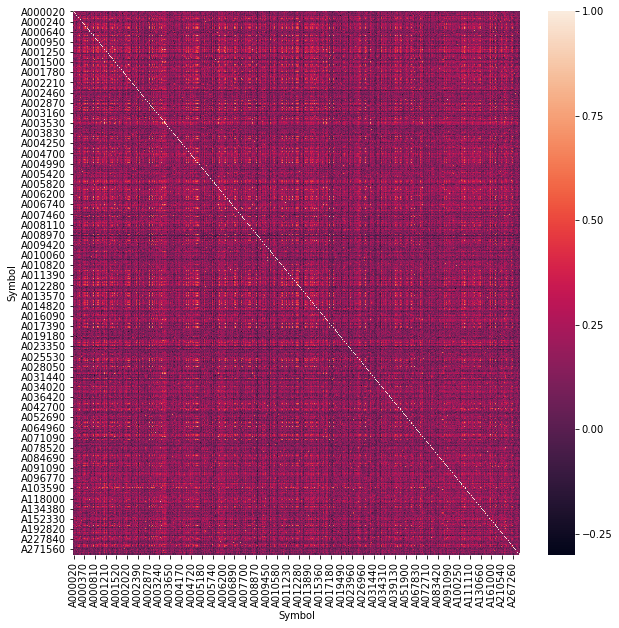

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

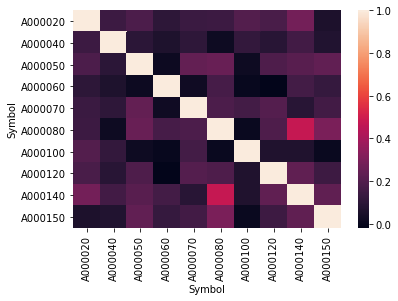

In [25]:
sns.heatmap(corr.iloc[:10, :10])

In [26]:
pca = PCA()
pca.fit(df_return)
return_pca = pca.transform(df_return)
return_pca.shape

(243, 243)

### Eigen Portfolio

In [27]:
df_return.mul(pca.components_[0]).sum(axis=1)

Date
2018-01-03   -3.5432
2018-01-04    4.7109
2018-01-05   -8.7842
2018-01-08   -0.1702
2018-01-09   -0.3383
               ...  
2018-12-21    2.1823
2018-12-24    6.2925
2018-12-26   17.5016
2018-12-27   -5.6331
2018-12-28   -9.2270
Length: 243, dtype: float64

In [28]:
print("Variance Explanation Ratio")
print("1st Eigen Vector: {:.4f}".format(pca.explained_variance_ratio_[0]))


Variance Explanation Ratio
1st Eigen Vector: 0.1842


In [29]:
eig1 = pca.components_[0] / pca.components_[0].sum()

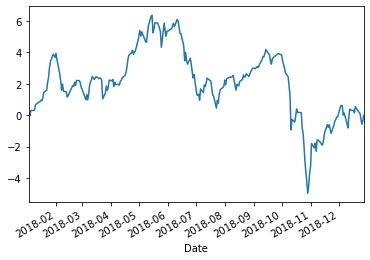

In [30]:
ep_return_df = df_return.mul(eig1, axis=1)
ep_return = ep_return_df.sum(axis=1)
ep_return.cumsum().plot()

### Market Portfolio

In [31]:
df_cap = df['시가총액 (52주 평균)(백만원)']
df_cap_w = df_cap.divide(df_cap.sum(axis=1), axis=0)
df_cap_w.sum(axis=1)

Date
2018-01-02   1.0000
2018-01-03   1.0000
2018-01-04   1.0000
2018-01-05   1.0000
2018-01-08   1.0000
              ...  
2018-12-21   1.0000
2018-12-24   1.0000
2018-12-26   1.0000
2018-12-27   1.0000
2018-12-28   1.0000
Length: 244, dtype: float64

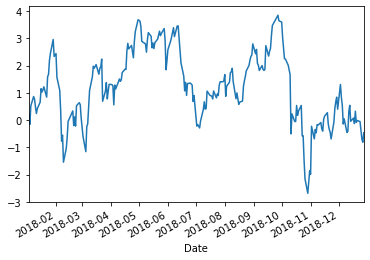

In [32]:
mp_return_df = df_return * df_cap_w[1:]
mp_return = mp_return_df.sum(axis=1)
mp_return.cumsum().plot()

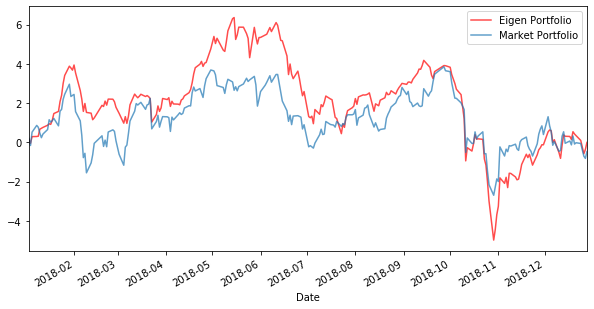

In [33]:
plt.figure(figsize=(10, 5))
ep_return.cumsum().plot(color='red', alpha=.7, label='Eigen Portfolio')
mp_return.cumsum().plot(alpha=.7, label='Market Portfolio')
plt.legend()

#### Eigen Vector 분석

Text(0, 0.5, 'Ratio of Variance Explanation')

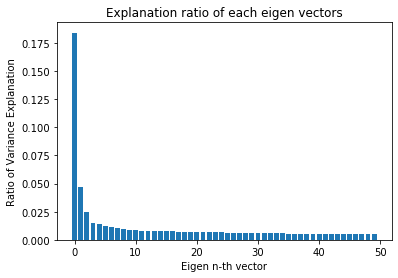

In [34]:
eig_lim = 50
plt.bar(range(eig_lim), pca.explained_variance_ratio_[:eig_lim])
plt.title('Explanation ratio of each eigen vectors')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

Text(0, 0.5, 'Ratio of Variance Explanation')

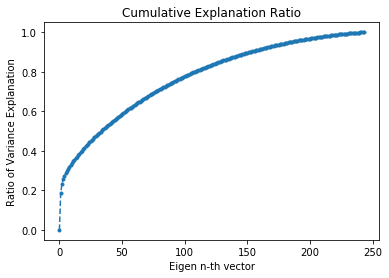

In [35]:
eig_lim = len(pca.explained_variance_ratio_)
plt.plot(range(eig_lim + 1), [0] + list(pca.explained_variance_ratio_[:eig_lim].cumsum()), marker='o', linestyle='--', markersize=3)
plt.title('Cumulative Explanation Ratio')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

In [36]:
eig_lim = 5
print("Explanation Ratio of {} Eigen vectors: {:.3f}".format(eig_lim, pca.explained_variance_ratio_[:eig_lim].sum()))

Explanation Ratio of 5 Eigen vectors: 0.285


In [37]:
df_eig_loading = pd.DataFrame()
for i in range(len(pca.components_)):
    df_eig_loading[i] = pd.Series(pca.components_[i])
df_eig_loading.index = df_return.columns
df_eig_loading

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,-0.0395,-0.0348,-0.0610,-0.0297,-0.0085,-0.0812,0.0067,0.0269,0.0064,0.0536,...,-0.0504,-0.0249,0.0154,-0.0446,0.1096,0.0094,-0.0123,0.0138,-0.0039,-0.0443
A000040,-0.0145,-0.0307,0.0117,-0.0029,-0.0624,-0.0553,0.0242,-0.0226,0.0143,0.0284,...,-0.0043,0.0071,0.0399,-0.0441,0.0170,-0.0539,0.0519,-0.0414,-0.0007,0.0324
A000050,-0.0343,-0.0095,0.0058,-0.0187,0.0403,-0.0008,0.0665,-0.0551,-0.0368,-0.0286,...,0.0544,0.0502,-0.0265,-0.0366,0.0163,0.0283,0.0291,0.0389,0.0147,-0.0501
A000060,-0.0148,-0.0291,0.0693,0.0224,-0.0132,-0.0667,-0.0890,-0.0318,-0.0328,0.0408,...,-0.0230,-0.0109,0.0144,-0.0071,0.0396,-0.0223,0.0136,-0.0425,-0.0570,-0.0213
A000070,-0.0288,-0.0053,0.0387,-0.0583,0.0597,0.0162,0.0607,-0.0222,0.0125,-0.0611,...,-0.0588,0.0421,-0.0195,-0.0502,-0.0394,0.0088,-0.0224,-0.0439,0.0124,-0.0251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A272550,-0.0314,-0.0194,0.0041,-0.0108,0.0117,0.0183,0.0467,0.0194,0.0269,-0.0446,...,0.0561,0.0090,0.0088,0.0818,0.0352,0.0068,0.0023,-0.0574,-0.0151,0.0354
A280360,-0.0202,-0.0158,0.0141,-0.0019,-0.0274,0.0359,-0.0129,-0.0086,0.0379,-0.0356,...,-0.0228,0.0202,0.0183,-0.0454,0.0332,0.0045,-0.0330,0.0237,-0.0783,0.0123
A281820,-0.0349,-0.0451,-0.0302,0.0220,-0.0462,0.0502,-0.0623,-0.0442,0.0193,-0.0303,...,-0.0325,-0.0545,0.0215,-0.0389,-0.0389,-0.0293,-0.0519,-0.0304,0.0280,-0.0032


[Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'),
 Text(0, 0, '자동차 및 트레일러 제조업'),
 Text(0, 0, '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'),
 Text(0, 0, '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'),
 Text(0, 0, '화학물질 및 화학제품 제조업; 의약품 제외'),
 Text(0, 0, '소매업; 자동차 제외')]

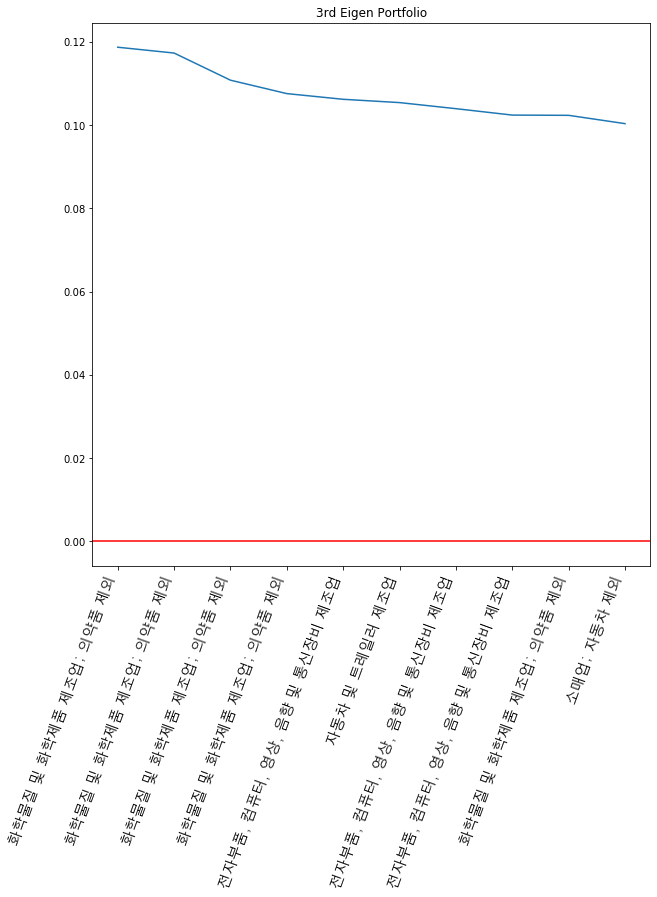

In [38]:
import matplotlib
from matplotlib.font_manager import FontProperties
%matplotlib inline

# matplotlib.rc('font', family='HYsanB') 

font_path = 'C:/Windows/Fonts/H2GTRM.TTF'
fontprop = FontProperties(fname=font_path, size=15)
n_th = 5
df_eig_loading = df_eig_loading.sort_values(by=[n_th], ascending=False)

f, ax = plt.subplots(1,1, figsize=(10,10))
# x = df_eig_loading.index[:]
# y = df_eig_loading[n_th][:]

# Long Top 10 Portfolio
x = df_eig_loading.index[:10]
y = df_eig_loading[n_th][:10]

# Short Top 10 Portfolio
# x = df_eig_loading.index[-10:]
# y = df_eig_loading[n_th][-10:]

xx = list(sector_df.loc['중분류', x])

ax.set_title('3rd Eigen Portfolio')
ax.plot(x, y)
ax.axhline(0, color='r')
ax.set_xticklabels(xx, rotation=70, ha='right', fontproperties=fontprop)

### Linear Regression

#### 모든 주식의 추정된 회귀계수(Coefficients) Matrix 생성

In [39]:
df_eig = pd.DataFrame()
eig_lim = 5
for i in range(eig_lim):
    df_eig[i] = df_return.mul(pca.components_[i], axis=1).sum(axis=1)
df_eig

,0,1,2,3,4
Date,,,,,
2018-01-03,-3.5432,-0.5557,-4.4119,1.1070,-5.1421
2018-01-04,4.7109,5.5640,0.0102,2.1319,-6.3433
2018-01-05,-8.7842,-6.2491,-1.0008,-4.3037,-5.0186
2018-01-08,-0.1702,-1.4307,3.8245,-2.5118,-5.2568
2018-01-09,-0.3383,-1.7641,5.5907,-0.2168,1.9722
...,...,...,...,...,...
2018-12-21,2.1823,-1.0692,-1.4132,-3.0195,-3.3674
2018-12-24,6.2925,1.1746,2.1075,0.4103,-3.3044
2018-12-26,17.5016,1.6378,-2.2119,0.7514,-0.9646


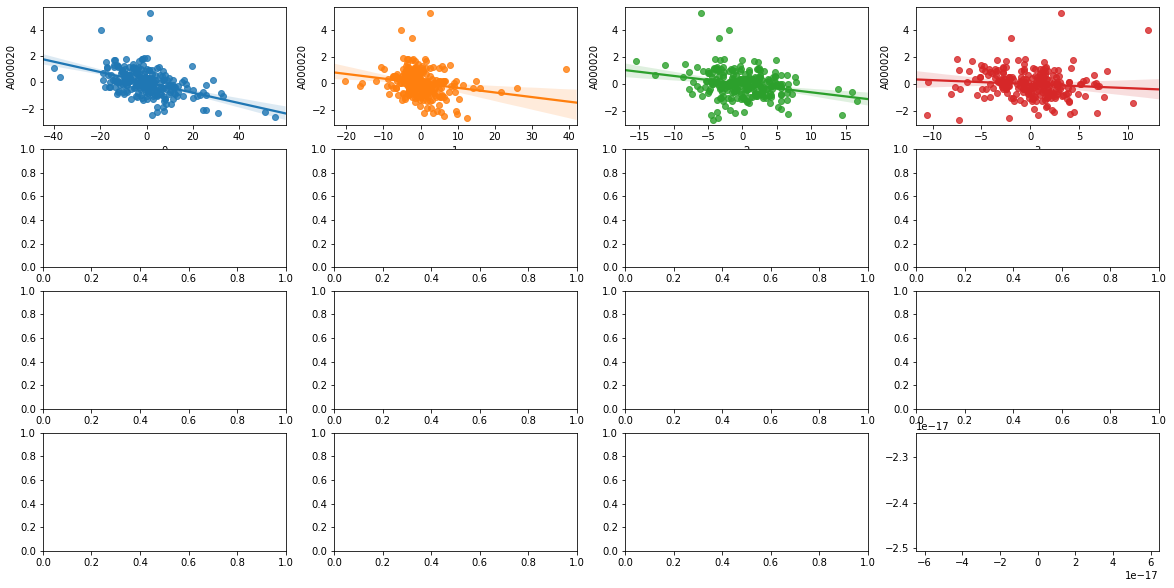

In [40]:
# 각 변수(시간)별 선형회귀 그래프
fig, axs = plt.subplots(figsize=(20,10), ncols=4, nrows=4)
features = df_eig.columns[:-1]  # label 을 제외한 컬럼(종속 변수)
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=df_eig[feature], y=df_return.iloc[:, 0], ax=axs[row][col])

In [41]:
df_reg = df_eig.copy()
df_reg = sm.add_constant(df_reg)
df_reg

C:\Users\USER\Anaconda3\envs\py36_ml\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,0,1,2,3,4
Date,,,,,,
2018-01-03,1.0000,-3.5432,-0.5557,-4.4119,1.1070,-5.1421
2018-01-04,1.0000,4.7109,5.5640,0.0102,2.1319,-6.3433
2018-01-05,1.0000,-8.7842,-6.2491,-1.0008,-4.3037,-5.0186
2018-01-08,1.0000,-0.1702,-1.4307,3.8245,-2.5118,-5.2568
2018-01-09,1.0000,-0.3383,-1.7641,5.5907,-0.2168,1.9722
...,...,...,...,...,...,...
2018-12-21,1.0000,2.1823,-1.0692,-1.4132,-3.0195,-3.3674
2018-12-24,1.0000,6.2925,1.1746,2.1075,0.4103,-3.3044
2018-12-26,1.0000,17.5016,1.6378,-2.2119,0.7514,-0.9646


#### 개별 주식의 회귀분석 결과 예시

In [42]:
# tic = ticker_series[ticker_series == '삼성전자'].index[0]
stock_idx = 3
print(ticker_series[df_return.columns[stock_idx]])
results = sm.OLS(df_return.iloc[:,stock_idx] ,df_reg).fit()

메리츠화재


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                A000060   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     8.738
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.27e-07
Time:                        18:01:58   Log-Likelihood:                -323.74
No. Observations:                 243   AIC:                             659.5
Df Residuals:                     237   BIC:                             680.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-18      0.060   1.16e-16      1.000      -0.117       0.117
0             -0.0148      0.005     -2.906      0.004      -0.025      -0.005
1             -0.0291      0.010     -2.908      0.004      -0.049      -0.009
2              0.0693      0.014      4.964      0.000       0.042       0.097
3              0.0224      0.018      1.272      0.205      -0.012       0.057
4             -0.0132      0.018     -0.726      0.468      -0.049       0.023
==============================================================================
Omnibus:                       61.819   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.794
Skew:                           1.075   Prob(JB):                     1.66e-41
Kurtosis:                       6.731   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Clustering

#### Factor Loading 공간 내에서의 Clustering

In [44]:
df_params = pd.DataFrame()
for ticker in df_return.columns:
    results = sm.OLS(df_return.loc[:,ticker] ,df_reg).fit()
    df_params[ticker] = results.params
df_params = df_params.T
df_params

,const,0,1,2,3,4
A000020,-0.0000,-0.0395,-0.0348,-0.0610,-0.0297,-0.0085
A000040,-0.0000,-0.0145,-0.0307,0.0117,-0.0029,-0.0624
A000050,-0.0000,-0.0343,-0.0095,0.0058,-0.0187,0.0403
A000060,0.0000,-0.0148,-0.0291,0.0693,0.0224,-0.0132
A000070,-0.0000,-0.0288,-0.0053,0.0387,-0.0583,0.0597
...,...,...,...,...,...,...
A272550,0.0000,-0.0314,-0.0194,0.0041,-0.0108,0.0117
A280360,0.0000,-0.0202,-0.0158,0.0141,-0.0019,-0.0274
A281820,0.0000,-0.0349,-0.0451,-0.0302,0.0220,-0.0462
A282330,-0.0000,-0.0157,-0.0162,0.0701,-0.0077,0.0874


In [45]:
pd.DataFrame({'Mean': df_params.mean(axis=0), 'Var': df_params.var(axis=0)})

,Mean,Var
const,-0.0000,0.0000
0,-0.0345,0.0001
1,-0.0048,0.0013
2,0.0014,0.0013
3,0.0001,0.0013
4,0.0013,0.0013


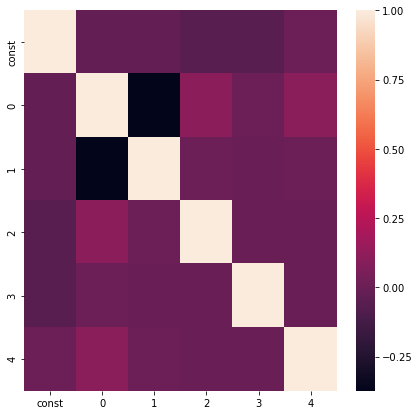

In [46]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_params.corr())

In [47]:
scaler = StandardScaler()
df_params_std = scaler.fit_transform(df_params)

risk_factor_pca = PCA()
risk_factor_pca.fit(df_params_std)
rfp = risk_factor_pca.transform(df_params_std)
rfp.shape

(750, 6)

Text(0, 0.5, 'Ratio of Variance Explanation')

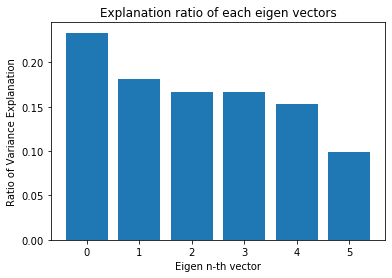

In [48]:
eig_lim = len(risk_factor_pca.explained_variance_ratio_)
plt.bar(range(eig_lim), risk_factor_pca.explained_variance_ratio_[:eig_lim])
plt.title('Explanation ratio of each eigen vectors')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

#### Factor Loading의 P-value 공간 내에서의 Clustering

In [49]:
df_pval = pd.DataFrame()
for ticker in df_return.columns:
    results = sm.OLS(df_return.loc[:,ticker] ,df_reg).fit()
    df_pval[ticker] = results.pvalues
df_pval = df_pval.T
df_pval

,const,0,1,2,3,4
A000020,1.0000,0.0000,0.0001,0.0000,0.0582,0.5993
A000040,1.0000,0.0061,0.0032,0.4176,0.8726,0.0010
A000050,1.0000,0.0000,0.3362,0.6723,0.2802,0.0252
A000060,1.0000,0.0040,0.0040,0.0000,0.2047,0.4684
A000070,1.0000,0.0000,0.5839,0.0044,0.0007,0.0008
...,...,...,...,...,...,...
A272550,1.0000,0.0000,0.0539,0.7718,0.5431,0.5215
A280360,1.0000,0.0002,0.1319,0.3365,0.9196,0.1513
A281820,1.0000,0.0000,0.0000,0.0194,0.1756,0.0063
A282330,1.0000,0.0016,0.0943,0.0000,0.6486,0.0000


In [50]:
pd.DataFrame({'Mean': df_pval.mean(axis=0), 'Var': df_pval.var(axis=0)})

,Mean,Var
const,1.0000,0.0000
0,0.0080,0.0034
1,0.1537,0.0692
2,0.2305,0.0892
3,0.2832,0.0982
4,0.3163,0.0970


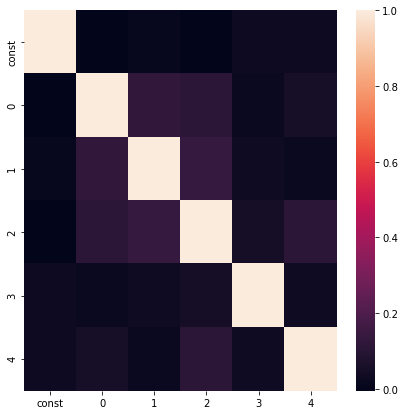

In [51]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_pval.corr())

In [52]:
scaler = StandardScaler()
df_pval_std = scaler.fit_transform(df_pval)

In [53]:
risk_pval_pca = PCA()
risk_pval_pca.fit(df_pval_std)
rpp = risk_pval_pca.transform(df_pval_std)
rpp.shape

(750, 6)

Text(0, 0.5, 'Ratio of Variance Explanation')

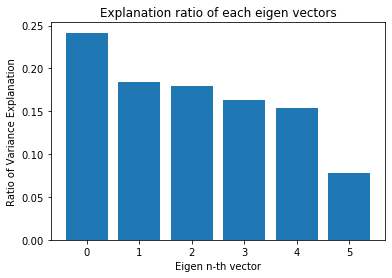

In [54]:
eig_lim = len(risk_pval_pca.explained_variance_ratio_)
plt.bar(range(eig_lim), risk_pval_pca.explained_variance_ratio_[:eig_lim])
plt.title('Explanation ratio of each eigen vectors')
plt.xlabel('Eigen n-th vector')
plt.ylabel('Ratio of Variance Explanation')

#### tSNE 시각화를 통한 군집 확인

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [56]:
"""
df_eig_pval = pd.DataFrame()
eig_lim = 5
for i in range(eig_lim):
    df_eig_pval[i] = df_pval.mul(risk_pval_pca.components_[i]).sum(axis=1)
df_eig_pval
"""

'\ndf_eig_pval = pd.DataFrame()\neig_lim = 5\nfor i in range(eig_lim):\n    df_eig_pval[i] = df_pval.mul(risk_pval_pca.components_[i]).sum(axis=1)\ndf_eig_pval\n'

In [57]:
df_eig_pval = pd.DataFrame(risk_pval_pca.transform(df_pval_std))
df_eig_pval.index = df_pval.index
df_eig_pval

,0,1,2,3,4,5
A000020,-0.6251,-0.2038,-1.1734,0.4389,0.5510,-0.1544
A000040,0.1060,-1.0795,1.7062,0.0866,-1.0940,-0.1668
A000050,0.7511,0.7001,0.6321,-1.0961,-1.0401,1.2199
A000060,-0.6267,-0.3067,-0.5678,0.5116,0.4166,-0.4464
A000070,-0.2948,1.8820,0.6147,-0.6196,0.9425,2.1251
...,...,...,...,...,...,...
A272550,1.1888,-1.1607,-0.2181,-0.5834,-1.1867,0.4337
A280360,0.3510,-1.2342,1.6479,-0.0137,-0.4248,0.1789
A281820,-1.1931,0.4619,0.3539,0.3062,-0.2245,-0.5306
A282330,-0.7074,-0.4212,1.4919,0.4000,0.0731,-0.4486


In [58]:
tsne_obj= tsne.fit_transform(df_eig_pval.iloc[:, :5])

In [59]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                       })#'digit':y})
tsne_df.head()

,X,Y
0,26.3760,-9.3830
1,-22.0457,-9.2954
2,11.5833,5.9682
3,18.8558,-6.0013
4,-1.8402,5.7055


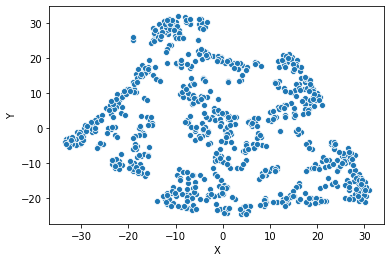

In [60]:
sns.scatterplot(x="X", y="Y", data=tsne_df)

In [61]:
wcss = []
cnum = 21
for i in range(1, cnum):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=1)
    kmeans_pca.fit(df_eig_pval.iloc[:, :5])
    wcss.append(kmeans_pca.inertia_)

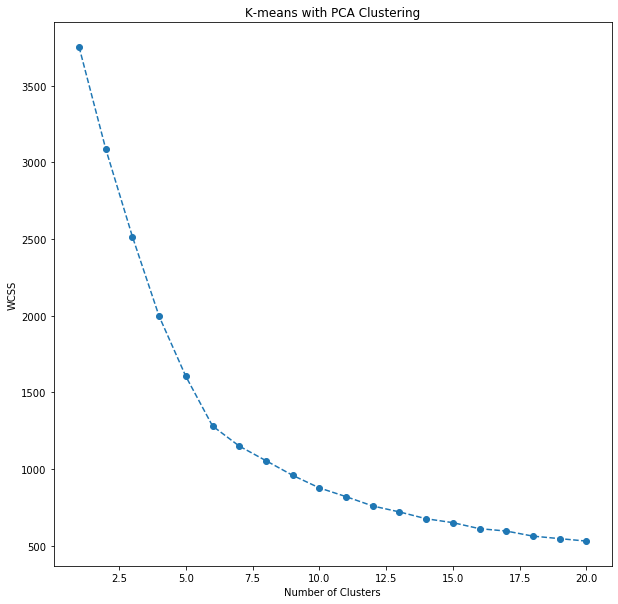

In [62]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, cnum), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [63]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=1)
kmeans_pca.fit(df_eig_pval.iloc[:, :5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [64]:
df_eig_pval_km = df_eig_pval.copy()
df_eig_pval_km['cluster'] = kmeans_pca.labels_
df_eig_pval_km

,0,1,2,3,4,5,cluster
A000020,-0.6251,-0.2038,-1.1734,0.4389,0.5510,-0.1544,0
A000040,0.1060,-1.0795,1.7062,0.0866,-1.0940,-0.1668,1
A000050,0.7511,0.7001,0.6321,-1.0961,-1.0401,1.2199,3
A000060,-0.6267,-0.3067,-0.5678,0.5116,0.4166,-0.4464,0
A000070,-0.2948,1.8820,0.6147,-0.6196,0.9425,2.1251,4
...,...,...,...,...,...,...,...
A272550,1.1888,-1.1607,-0.2181,-0.5834,-1.1867,0.4337,3
A280360,0.3510,-1.2342,1.6479,-0.0137,-0.4248,0.1789,1
A281820,-1.1931,0.4619,0.3539,0.3062,-0.2245,-0.5306,1
A282330,-0.7074,-0.4212,1.4919,0.4000,0.0731,-0.4486,1


In [65]:
def tsne_visualize(df_obj):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_obj= tsne.fit_transform(df_obj)
    tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1]})
    sns.scatterplot(x='X', y='Y', data=tsne_df)

In [66]:
tsne_obj= tsne.fit_transform(df_eig_pval.iloc[:, :5])
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'digit':df_eig_pval_km['cluster']})
tsne_df.head()

,X,Y,digit
A000020,26.3760,-9.3830,0
A000040,-22.0457,-9.2954,1
A000050,11.5833,5.9682,3
A000060,18.8558,-6.0013,0
A000070,-1.8402,5.7055,4


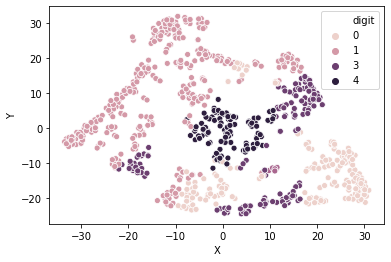

In [67]:
sns.scatterplot(x="X", y="Y", hue="digit", data=tsne_df)

In [68]:
df_pval.loc[df_eig_pval_km['cluster'] == 3,:]

,const,0,1,2,3,4
A000050,1.0000,0.0000,0.3362,0.6723,0.2802,0.0252
A000140,1.0000,0.0000,0.0081,0.7735,0.0055,0.8442
A000300,1.0000,0.0000,0.3946,0.8648,0.0083,0.2203
A000320,1.0000,0.0000,0.2469,0.9402,0.0000,0.2447
A000430,1.0000,0.0000,0.0000,0.6218,0.0659,0.3052
...,...,...,...,...,...,...
A264900,1.0000,0.0000,0.1354,0.5127,0.0519,0.4357
A267290,1.0000,0.0003,0.4694,0.7274,0.8656,0.7674
A272450,1.0000,0.0000,0.0029,0.7537,0.4229,0.0930
A272550,1.0000,0.0000,0.0539,0.7718,0.5431,0.5215


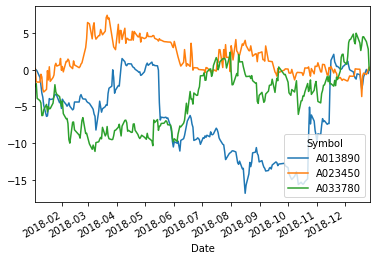

In [69]:
df_return.loc[df_return.index[0:300], df_eig_pval_km['cluster']==2].cumsum().iloc[:, 3:7].plot()

### P value가 유의한 팩터들이 동일한 주식들 구분

In [70]:
pval_thr = 0.05
df_pval_bool = df_pval < pval_thr
df_pval_bool

,const,0,1,2,3,4
A000020,False,True,True,True,False,False
A000040,False,True,True,False,False,True
A000050,False,True,False,False,False,True
A000060,False,True,True,True,False,False
A000070,False,True,False,True,True,True
...,...,...,...,...,...,...
A272550,False,True,False,False,False,False
A280360,False,True,False,False,False,False
A281820,False,True,True,True,False,True
A282330,False,True,False,True,False,True


In [71]:
def classify_duplicate(df):
    df_c = df.copy()
    df_list = []
    df_non = pd.DataFrame()
    idx_list = df.index
    for idx in idx_list:
        if idx not in df_c.index:
            continue
        # print(idx)
        temp_df = pd.DataFrame()
        # temp_df[idx] = df_c.loc[idx,:]
        temp_series = df_c.loc[idx, :]
        df_c = df_c.drop(idx)
        cnt = 0
        for idx2 in df_c.index:
            if (temp_series == df_c.loc[idx2, :]).all():
                # print(idx, idx2)
                temp_df[idx2] = df_c.loc[idx2, :]
                df_c = df_c.drop(idx2)
                cnt += 1
        if cnt == 0:
            df_non[idx] = temp_series
        else:
            temp_df[idx] = temp_series
            df_list.append(temp_df.T)
    return df_list, df_non.T

In [72]:
classified_list, df_nc = classify_duplicate(df_pval_bool)
print("Class Num: {} \nNotClass Records: {}".format(len(classified_list), len(df_nc)))

Class Num: 18 
NotClass Records: 7


In [154]:
classified_list[1]

,const,0,1,2,3,4
A000400,False,True,True,False,False,True
A001510,False,True,True,False,False,True
A002140,False,True,True,False,False,True
A002220,False,True,True,False,False,True
A004560,False,True,True,False,False,True
A004840,False,True,True,False,False,True
A004910,False,True,True,False,False,True
A005930,False,True,True,False,False,True
A006040,False,True,True,False,False,True
A006220,False,True,True,False,False,True


In [155]:
for i, d in enumerate(classified_list):
    print('{}th cluster: {}'.format(i+1, len(d)))

1th cluster: 74
2th cluster: 26
3th cluster: 14
4th cluster: 12
5th cluster: 44
6th cluster: 59
7th cluster: 49
8th cluster: 62
9th cluster: 116
10th cluster: 67
11th cluster: 37
12th cluster: 86
13th cluster: 14
14th cluster: 26
15th cluster: 8
16th cluster: 23
17th cluster: 23
18th cluster: 3


In [156]:
sector_df.loc['중분류', classified_list[15].index]

A001430                  1차 금속 제조업
A003610             섬유제품 제조업; 의복제외
A004270                도매 및 상품 중개업
A005030             자동차 및 트레일러 제조업
A006740          펄프, 종이 및 종이제품 제조업
A006890    화학물질 및 화학제품 제조업; 의약품 제외
A008600                도매 및 상품 중개업
A010100             자동차 및 트레일러 제조업
A011700             기타 기계 및 장비 제조업
A012690          펄프, 종이 및 종이제품 제조업
A016090     의복, 의복 액세서리 및 모피제품 제조업
A017370             기타 기계 및 장비 제조업
A023150                     음료 제조업
A024900             자동차 및 트레일러 제조업
A027970          펄프, 종이 및 종이제품 제조업
A034590      전기, 가스, 증기 및 공기조절 공급업
A049800             기타 기계 및 장비 제조업
A051630            고무 및 플라스틱제품 제조업
A053210                        방송업
A092440             기타 기계 및 장비 제조업
A093230                도매 및 상품 중개업
A145720      의료, 정밀, 광학기기 및 시계 제조업
A001390    화학물질 및 화학제품 제조업; 의약품 제외
Name: 중분류, dtype: object

### 유의한 팩터가 동일한 주식끼리 팩터 로딩 클러스터링

In [157]:
for d in classified_list[:10]:
    target_tickers = d.index
    factor_sig = d.iloc[0,:]
    k = factor_sig.sum()
    print(factor_sig)
    print(k)
    kmeans_pca = KMeans(n_clusters = k, init = 'k-means++', random_state=1)
    kmeans_pca.fit(df_params.loc[target_tickers, factor_sig])
    d['cluster'] = kmeans_pca.labels_

const    False
0         True
1         True
2         True
3        False
4        False
Name: A000060, dtype: bool
3
const    False
0         True
1         True
2        False
3        False
4         True
Name: A000400, dtype: bool
3
const    False
0         True
1        False
2        False
3        False
4         True
Name: A000890, dtype: bool
2
const    False
0         True
1        False
2         True
3         True
4         True
Name: A002240, dtype: bool
4
const    False
0         True
1         True
2         True
3         True
4         True
Name: A000720, dtype: bool
5
const    False
0         True
1         True
2         True
3         True
4        False
Name: A000220, dtype: bool
4
const    False
0         True
1        False
2         True
3        False
4        False
Name: A000150, dtype: bool
2
const    False
0         True
1         True
2        False
3         True
4        False
Name: A000390, dtype: bool
3
const    False
0         True
1         True
2  

In [158]:
classified_list

[         const     0     1     2      3      4  cluster
 A000060  False  True  True  True  False  False        2
 A000210  False  True  True  True  False  False        2
 A000270  False  True  True  True  False  False        2
 A000880  False  True  True  True  False  False        2
 A000990  False  True  True  True  False  False        1
 ...        ...   ...   ...   ...    ...    ...      ...
 A195870  False  True  True  True  False  False        1
 A204320  False  True  True  True  False  False        2
 A267260  False  True  True  True  False  False        0
 A268280  False  True  True  True  False  False        1
 A000020  False  True  True  True  False  False        1
 
 [74 rows x 7 columns],          const     0     1      2      3     4  cluster
 A000400  False  True  True  False  False  True        1
 A001510  False  True  True  False  False  True        1
 A002140  False  True  True  False  False  True        0
 A002220  False  True  True  False  False  True        0
 A0045

In [159]:
i=5
a = df_return.loc[:,classified_list[i].index[classified_list[i]['cluster'] == 2]].iloc[:, :10]
sector_df.loc['중분류', a.columns]

A000220                의료용 물질 및 의약품 제조업
A000520                의료용 물질 및 의약품 제조업
A001360                의료용 물질 및 의약품 제조업
A003000                의료용 물질 및 의약품 제조업
A003060                의료용 물질 및 의약품 제조업
A003090                         전문 서비스업
A003520                의료용 물질 및 의약품 제조업
A004310                의료용 물질 및 의약품 제조업
A004870    전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
A005500                의료용 물질 및 의약품 제조업
Name: 중분류, dtype: object

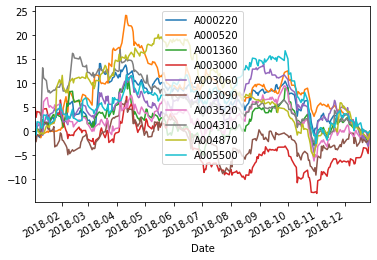

In [160]:
a.cumsum().plot()

In [197]:
def find_cointegrated_pairs(dataframe, critial_level=0.05):
    n = dataframe.shape[1]  # the length of dateframe
    pvalue_matrix = np.ones((n, n))  # initialize the matrix of p
    keys = dataframe.keys()  # get the column names
    pairs = []  # initilize the list for cointegration
    for i in range(n):
        for j in range(i + 1, n):  # for j bigger than i
            stock1 = np.log(dataframe[keys[i]])  # obtain the price of two contract
            stock2 = np.log(dataframe[keys[j]])
            # stock1 = dataframe[keys[i]]  # obtain the price of two contract
            # stock2 = dataframe[keys[j]]
            result = sm.tsa.stattools.coint(stock1, stock2)  # get conintegration
            pvalue = result[1]  # get the pvalue
            pvalue_matrix[i, j] = pvalue
            if pvalue < critial_level:  # if p-value less than the critical level
                pairs.append((keys[i], keys[j], pvalue))  # record the contract with that p-value

    return pvalue_matrix, pairs

In [198]:
target_c = classified_list[0]
stocks = target_c.index[target_c['cluster'] == 0]
pvals, pairs = find_cointegrated_pairs(df_price.loc[:, stocks])
df_pairs = pd.DataFrame(pairs, columns=['s1', 's2', 'pval'])
df_pairs = df_pairs.sort_index(by='pval').reset_index(drop=True)
df_pairs

C:\Users\CJ\Anaconda3\envs\py36_ml\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


,s1,s2,pval
0,A002900,A071950,0.0002
1,A002030,A025750,0.0029
2,A005960,A047400,0.0079
3,A005960,A103590,0.0119
4,A002030,A012160,0.0144
5,A002030,A002900,0.0158
6,A010820,A025750,0.0189
7,A026940,A071950,0.0207
8,A010820,A014580,0.0240
9,A012160,A071950,0.0281


In [199]:
ticker_series[['A002900', 'A071950']]

A002900    동양물산
A071950     코아스
Name: 0, dtype: object

In [200]:
sector_df[['A002900', 'A071950']]

,A002900,A071950
세세분류,농업 및 임업용 기계 제조업,가구 제조업
세분류,농업 및 임업용 기계 제조업,가구 제조업
소분류,특수 목적용 기계 제조업,가구 제조업
중분류,기타 기계 및 장비 제조업,가구 제조업
대분류,제조업,제조업


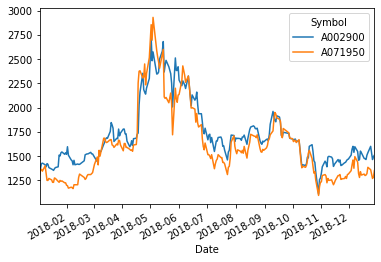

In [201]:
df_price.loc[:, df_pairs.loc[0, ['s1', 's2']]].plot()

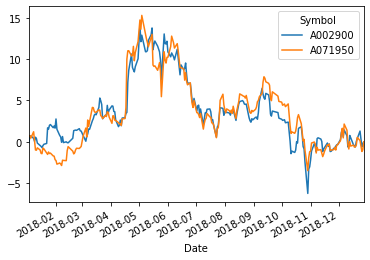

In [202]:
df_return.loc[:, df_pairs.loc[0, ['s1', 's2']]].cumsum().plot()

In [163]:
target_c = classified_list[0]
cluster_list = (target_c['cluster']).unique()
for c in cluster_list:
    stocks = target_c.index[target_c['cluster'] == c]
    find_cointegrated_pairs(df_price.loc[target_date, stocks])
    

KeyboardInterrupt: 

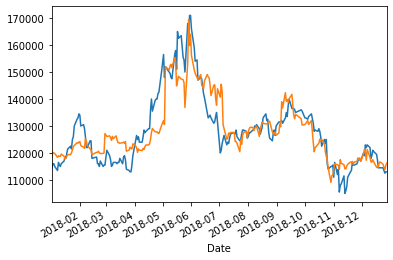

In [221]:
df_price[s1].plot()
(df_price[s2]*results.params[1] + results.params[0]).plot()

In [235]:
# s1 = 'A002900'
s1 = 'A002030'
# s2 = 'A071950'
s2 = 'A025750'
df_s1 = df_price[s1]
df_s2 = df_price[s2]
df_s2 =  sm.add_constant(df_s2)
results = sm.OLS(df_s1, df_s2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                A002030   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     643.2
Date:                Tue, 19 May 2020   Prob (F-statistic):           4.22e-70
Time:                        01:50:05   Log-Likelihood:                -2500.8
No. Observations:                 244   AIC:                             5006.
Df Residuals:                     242   BIC:                             5013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.856e+04   2760.179     21.214      0.000    5.31e+04     6.4e+04
A025750       42.1034      1.660     25.362      0.000      38.833      45.373
==============================================================================
Omnibus:                       10.009   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.578
Skew:                           0.102   Prob(JB):                     5.61e-05
Kurtosis:                       4.373   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

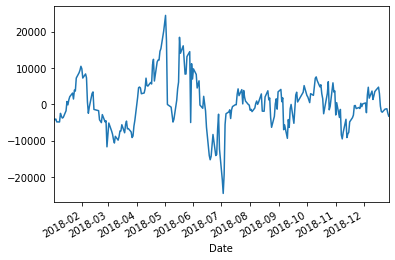

In [236]:
results.resid.plot()

In [238]:
adf_rest

(-4.463095479414933,
 0.00022914157365672705,
 0,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 4401.945551023911)

In [237]:
from statsmodels.tsa.stattools import adfuller
adf_rest = adfuller(results.resid)
adf_rest[1]

0.00022914157365672705

In [251]:
adf_coint_test(df_s1, df_s2)

(0.00022914157365672705, 42.103412929590874, 58555.12938731519)

In [250]:
def adf_coint_test(df1, df2):
    df2_temp = df2.copy()
    df2_temp = sm.add_constant(df2_temp)
    results = sm.OLS(df1, df2_temp).fit()
    coint_pval= adfuller(results.resid)[1]
    alpha = results.params[0]
    beta = results.params[1]
    
    return coint_pval, beta, alpha

In [267]:
def find_cointegrated_pairs_adf(dataframe, critial_level=0.02):
    n = dataframe.shape[1]  # the length of dateframe
    pvalue_matrix = np.ones((n, n))  # initialize the matrix of p
    keys = dataframe.keys()  # get the column names
    pairs = []  # initilize the list for cointegration
    for i in range(n):
        for j in range(i + 1, n):  # for j bigger than i
            stock1 = np.log(dataframe[keys[i]])  # obtain the price of two contract
            stock2 = np.log(dataframe[keys[j]])
            # stock1 = dataframe[keys[i]]  # obtain the price of two contract
            # stock2 = dataframe[keys[j]]
            pval, beta, alpha = adf_coint_test(stock1, stock2)  # get conintegration
            pvalue_matrix[i, j] = pval
            if pval < critial_level:  # if p-value less than the critical level
                pairs.append((keys[i], keys[j], pval, beta, alpha))  # record the contract with that p-value

    return pvalue_matrix, pairs

In [268]:
target_c = classified_list[0]
stocks = target_c.index[target_c['cluster'] == 0]
pvals, pairs = find_cointegrated_pairs_adf(df_price.loc[:, stocks])
df_pairs1 = pd.DataFrame(pairs, columns=['s1', 's2', 'pval', 'beta', 'alpha'])
df_pairs1 = df_pairs1.sort_index(by='pval').reset_index(drop=True)
df_pairs1

C:\Users\CJ\Anaconda3\envs\py36_ml\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\CJ\Anaconda3\envs\py36_ml\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


,s1,s2,pval,beta,alpha
0,A002900,A071950,0.0000,0.7619,1.8237
1,A002030,A025750,0.0005,0.5526,7.6674
2,A005960,A047400,0.0016,1.0071,1.3141
3,A005960,A103590,0.0026,0.7797,2.6044
4,A002030,A012160,0.0032,0.5630,7.7249
5,A002030,A002900,0.0036,0.4946,8.0790
6,A010820,A025750,0.0044,1.2699,-1.0780
7,A026940,A071950,0.0049,0.2000,6.4833
8,A010820,A014580,0.0060,1.7217,-5.4509
9,A012160,A071950,0.0069,0.6025,2.7225


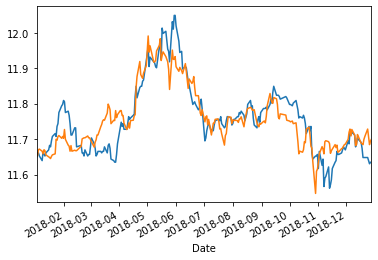

In [274]:
logp1 = np.log(df_price[df_pairs1.loc[5, 's1']])
logp2 = np.log(df_price[df_pairs1.loc[5, 's2']])
a = df_pairs1.loc[5, 'alpha']
b = df_pairs1.loc[5, 'beta']

pd.Series(logp1).plot()
pd.Series(logp2 * b + a).plot()